# Import dependencies

In [1]:
#!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117


In [2]:

#!pip install fvcore==0.1.1.dev200512

In [3]:
import torch
torch.cuda.is_available()

C:\Users\ingvilrh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

In [4]:
device = torch.device("cuda:0")
device
torch.cuda.device_count()

4

In [5]:
import torch
import torch.nn as nn
from trainer import Trainer, compute_loss_and_accuracy
from task3_model1 import *
from create_plots import create_plots
from load_my_custom import * 

# Set hyperparameters

In [6]:
epochs = 10
batch_size = 32
learning_rate = 1e-2 # Should be 5e-5 for LeNet
early_stop_count = 3

# Import data and create dataloaders

In [7]:
data = get_data(1, transform)
dataloaders = create_dataloaders(data, batch_size)

Loaded 7999 images
Training: 6399
Testing: 800
Validation: 800


# Create model and trainer

In [8]:
num_classes = count_classes(data)
model = Model1(3, 9) #torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)
trainer = Trainer(
    batch_size,
    learning_rate,
    early_stop_count,
    epochs,
    model,
    dataloaders
)
#trainer.train()

Your classes are:  ['Black Sea Sprat', 'Gilt-Head Bream', 'Hourse Mackerel', 'Red Mullet', 'Red Sea Bream', 'Sea Bass', 'Shrimp', 'Striped Red Mullet', 'Trout']
Model1(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Hardswish()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Hardswish()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (9): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Hardswish()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_

# Plot 

Model1(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Hardswish()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Hardswish()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (9): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Hardswish()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=32768, out_features=64, bias=True)
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affi

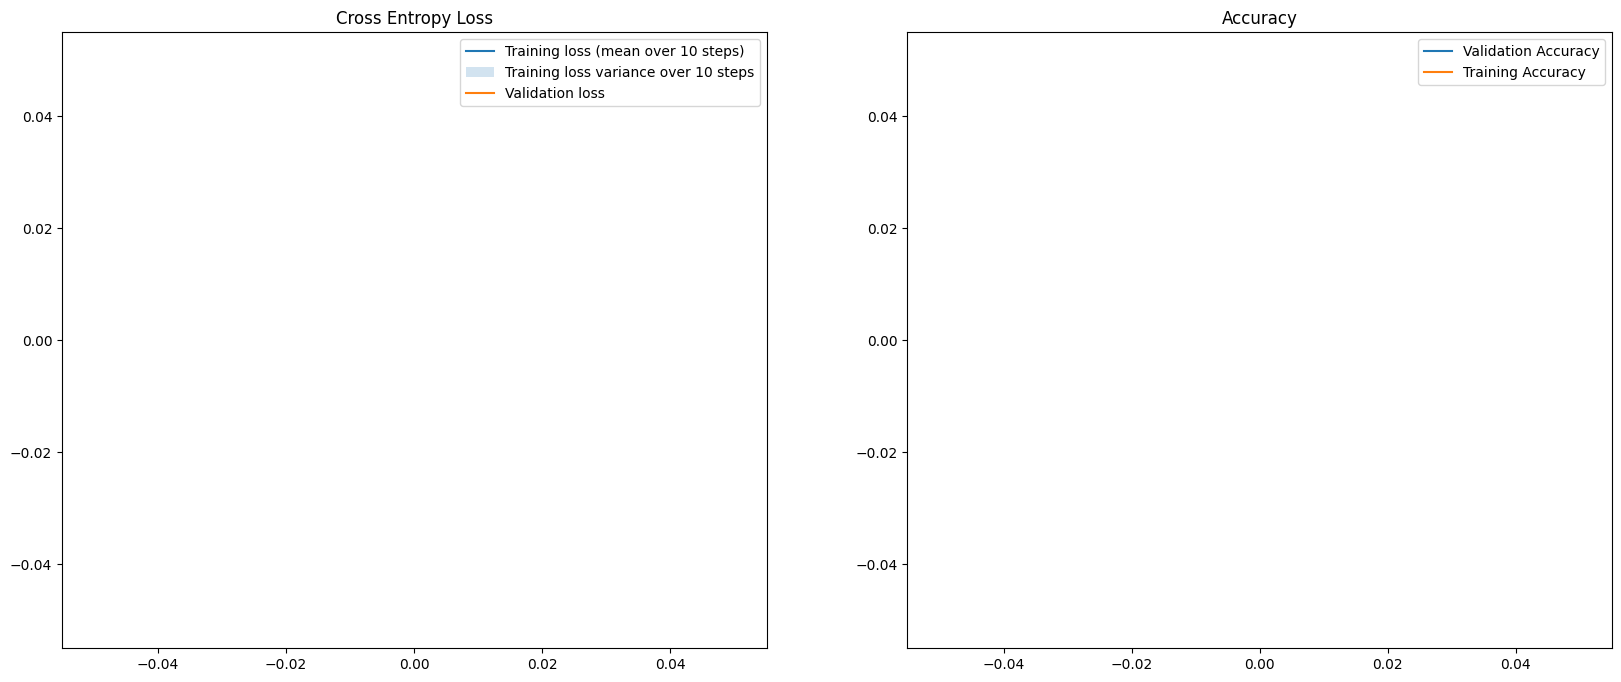

In [9]:
trainer = Trainer(
    batch_size,
    learning_rate,
    early_stop_count,
    epochs,
    model,
    dataloaders
)
trainer.load_best_model()
create_plots(trainer, "test")

In [10]:
from create_plots import create_plots
from utils import plot_loss

OrderedDict()
[]
[]
OrderedDict()
[]
[]
OrderedDict()
[]
[]
OrderedDict()
[]
[]


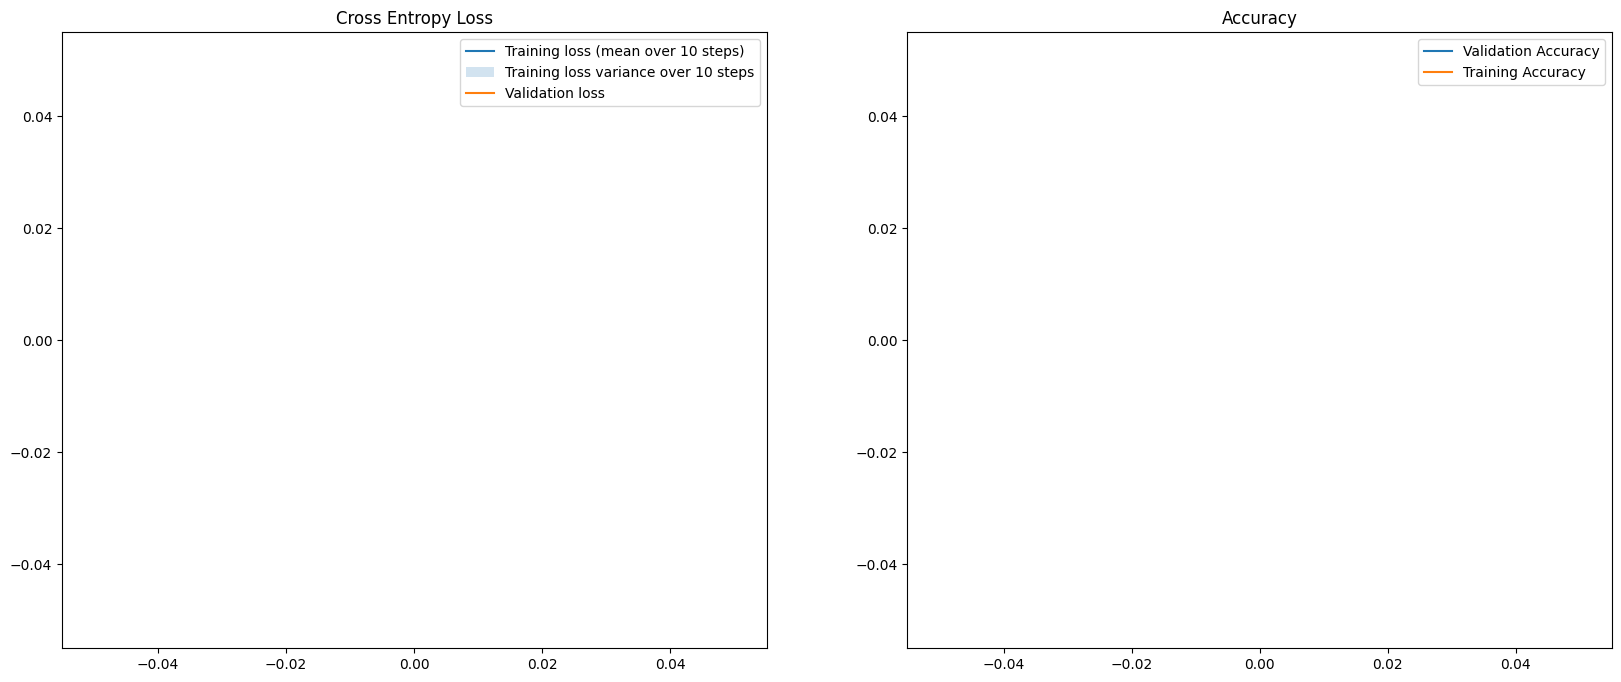

In [11]:
create_plots(trainer, "model1plot.png")

In [12]:
checkpoint = trainer.load_best_model()
print(checkpoint)


None


In [13]:
model.save_model_test()

AttributeError: 'Model1' object has no attribute 'save_model_test'